<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Matplotlib: Visualization with Python

<a href="http://matplotlib.org" target="_blank"><img src="http://matplotlib.org/_static/logo2.svg" alt="Matplotlib logo" width="500px"/></a>

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

* Create publication quality plots.
* Make interactive figures that can zoom, pan, update.
* Customize visual style and layout.
* Export to many file formats.
* Embed in JupyterLab and Graphical User Interfaces.
* Use a rich array of third-party packages built on Matplotlib.


## Installation and initialization

Install the *matplotlib* module by the following line of code
```
pip install matplotlib
```

Import the *pyplot* package by calling
```
import matplotlib.pyplot as plt
```

Next, we would like to tell the notebook that we want our plots displayed inline, rather than in a separate viewing window

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


The **inline** part was to tell the notebook to use Matplotlib's `nbagg` backend, which work good with the notebook (hence the `nb` in `nbagg`). Matplotlib has multiple "backends" that handle converting Matplotlib's in-memory representation of your plot into the colorful output you can look at. This is done either by writing files (e.g., png, svg, pdf) that you can use an external tool to look at or by embedding into your GUI toolkit of choice (Qt, Tk, Wx, etc).


## Our first plot

Let's plot the simple parabola
$$
f(x)=x^2
$$

Text(0.5,1,'Parabola')

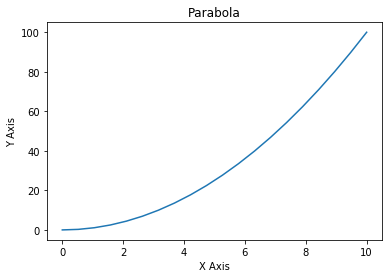

In [9]:
x = np.linspace(0, 10, 20)
plt.plot(x, x**2)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Parabola')


If you will execute this code inside common IDE (Pycharm, Visual Studio Code, etc.) you will get the following picture. Note, that we use another backbone that requires us to use the command to display the figure
```
plt.show()
```

![](img/matplotlib_pycharm.png)

## Anatomy of a "Plot"

People use "plot" to mean many different things. Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

![](img/figure_anatomy_objects.png)

The Figure is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and Figures can contain multiple Axes.

Most plotting ocurs on an Axes. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an Axes with a call to subplot (which places Axes on a regular grid), so in most cases, Axes and Subplot are synonymous.

Each Axes has an XAxis and a YAxis. These contain the ticks, tick locations, labels, etc. In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual Axis part of things all that much. However, it is worth mentioning here to explain where the term Axes comes from.

### Figures

If we want to control properties of the figure, we can explicitly create it with **plt.figure**. For example, we can control the size of the figure through the `figsize` argument, which expects a tuple of **(width, height)**.

Text(0.5,1,'Parabola')

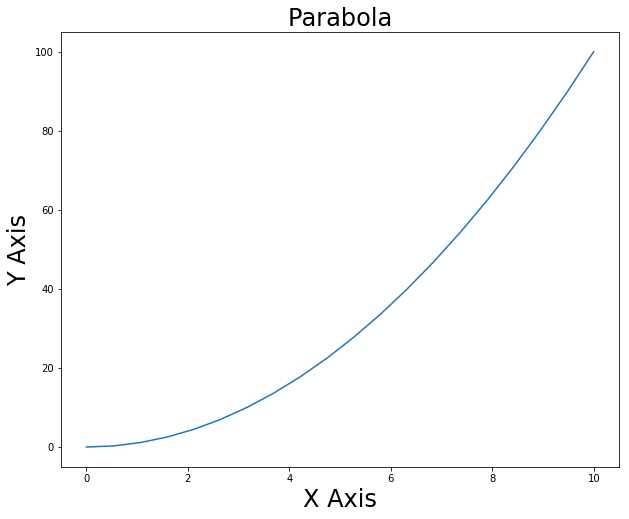

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(x, x**2)
plt.xlabel('X Axis', fontsize=24)
plt.ylabel('Y Axis', fontsize=24)
plt.title('Parabola', fontsize=24)

### Saving the figure

One can always save the figure using the following line of code
```
fig.savefig('filename.png', dpi=300)
```
while the first argument is the path of the file and the DPI (dots-per-inch) argument determines the resolution of the image we want to create


### Axes

We've mentioned before that a figure can have more than one `Axes` on it. 

There are few possibility to add `Axes` to the `Figure` we created. First one is the most flexible one allows to add `Axes` into the given position in the `Figure`:


Text(0.5,1,'Axes 4')

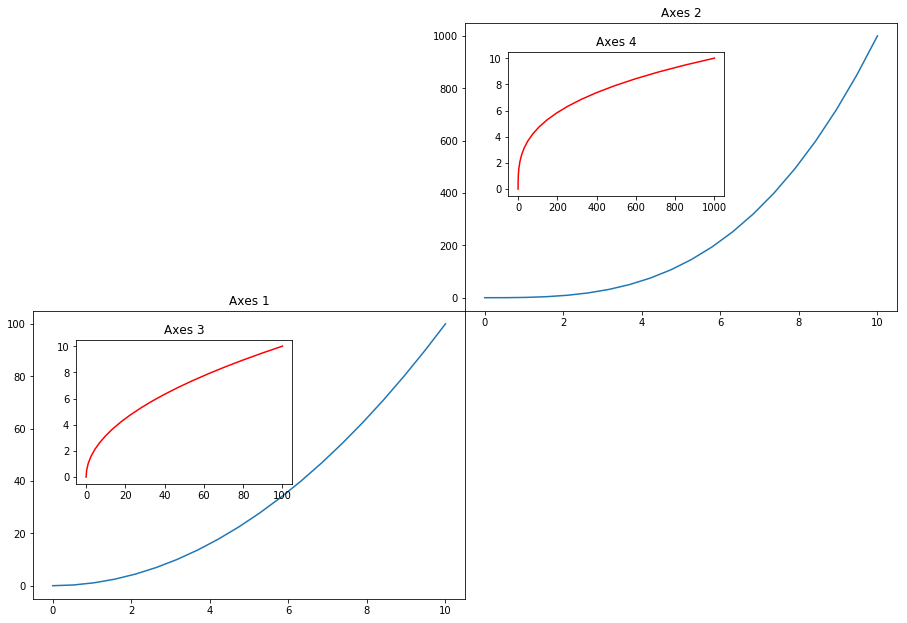

In [38]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1, 1, 1, 1])
ax3 = fig.add_axes([0.1, 0.4, 0.5, 0.5])
ax4 = fig.add_axes([1.1, 1.4, 0.5, 0.5])

ax1.plot(x, x**2)
ax1.set_title('Axes 1')
ax2.plot(x, x**3)
ax2.set_title('Axes 2')
ax3.plot(x**2, x, 'r')
ax3.set_title('Axes 3')
ax4.plot(x**3, x, 'r')
ax4.set_title('Axes 4')


Another possibility is to add single axes in the grid using the following 3 numbers notation: the number `232` means that we create the grid of `1` row and `2` columns and we put the axes on the second position:

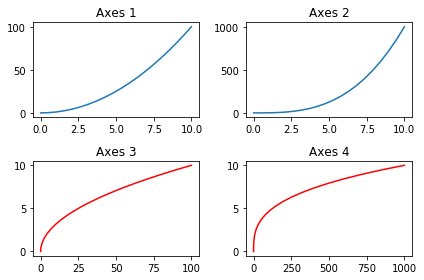

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(x, x**2)
ax1.set_title('Axes 1')
ax2.plot(x, x**3)
ax2.set_title('Axes 2')
ax3.plot(x**2, x, 'r')
ax3.set_title('Axes 3')
ax4.plot(x**3, x, 'r')
ax4.set_title('Axes 4')

fig.tight_layout()

### Multiple Axes in the grid structure

If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

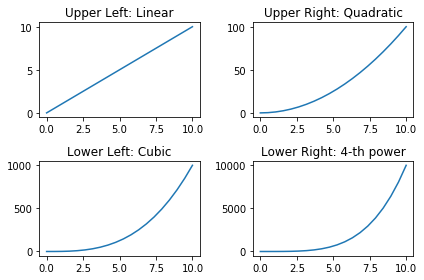

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left: Linear')
axes[0,1].set(title='Upper Right: Quadratic')
axes[1,0].set(title='Lower Left: Cubic')
axes[1,1].set(title='Lower Right: 4-th power')

# To iterate over all items in a multidimensional numpy array, 
# use the `flat` attribute
# Enumerate returns the tuple (index, value) of the array/list
for i, ax in enumerate(axes.flat):
    ax.plot(x, x**(i+1))

fig.tight_layout()

When `plt.subplots` is called with no arguments, it creates a new figure with a single subplot. So this will be our default way of creating a figure and axes.

*Tip* when you've finished plotting in the regular grid, call `fig.tight_layout()` to fix the layout.

### Properties of the Axes object

The most usefull and frequently used properties of the Axes objects are the following:
* `set_title` - sets the title of the `Axes`
* `set_xlabel`/`set_ylabel` - sets the label of the X or Y axis
* `set_xticks`/`set_yticks` - sets the ticks of the X or Y axis

All the above properties have the `fontsize` parameter that allows to control the appearance of the text 

In the following example we show the usage of the properties


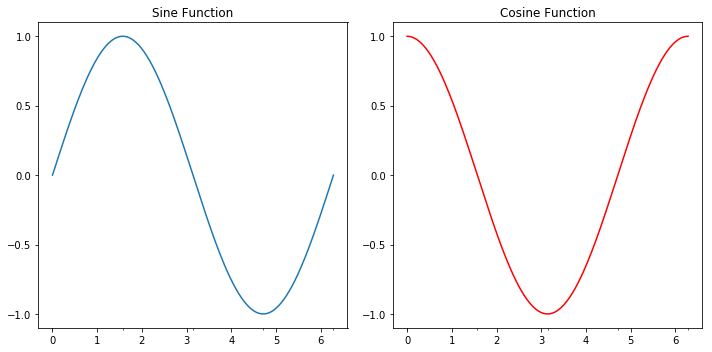

In [58]:
z = np.linspace(0, 2*np.pi, 200)
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

ax[0].plot(z, np.sin(z))
ax[0].set_xticks(np.linspace(0, 2*np.pi, 5), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax[0].set_yticks(np.linspace(-1, 1, 5))
ax[0].set_title('Sine Function')

ax[1].plot(z, np.cos(z), 'r')
ax[1].set_xticks(np.linspace(0, 2*np.pi, 5), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax[1].set_yticks(np.linspace(-1, 1, 5))
ax[1].set_title('Cosine Function')

fig.tight_layout()

## Exercise 1

Let's have a look at two other statistics.
**Plot the average, minimum, and maximum inflammation, all on the same plot.**

Also create a legend (`plt.legend`) with appropriate labels for each line.

Labels can be specified by adding `label=....` to `plot`.

Don't forget to add axes labels using `plt.xlabel` and `plt.ylabel`.

Use `plt.tick_params(labelsize = ...)` in order to set the ticks label size.

**Reminder**
- Edit cell by double clicking
- Run cell by pressing _Shift+Enter_
- Get autocompletion by pressing _Tab_
- Get documentation by pressing _Shift+Tab_

Next lets do a box plot -- Matplotlib will calculate the boxes for us.

- `medianprops` is a dictionary that contains extra properties for the median.
- `plt.xticks` determines where the ticks will be drawn (1st argument) and what they will say (2nd argument).

## Exercise 2

`plot` draws points with lines connecting them. 
But there are other plotting functions - a useful one is `bar`, which draws bars.

**Plot the max of each patient using a [bar-plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html).**

# References

- **[Matplotlib gallery](https://github.com/rasbt/matplotlib-gallery)**
- [Anatomy of Matplotlib](https://github.com/WeatherGod/AnatomyOfMatplotlib) tutorial by [Benjamin Root](https://github.com/WeatherGod).
- Slides: [Introduction to NumPy, SciPy, and matplotlib](https://speakerdeck.com/cfinch/introduction-to-numpy-scipy-and-matplotlib) by Craig Finch.
- Notebooks: [Long Matplotlib tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
- [How to speak Matplotlib](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb) - control colors, markers, linestyles, plot attributes, colormaps, annotations, arrows, hatches, transforms, and rc configuration.
- [Limits, legends, & layouts](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part4-Limits_Legends_and_Layouts.ipynb)- [Why People Hate Jet – and You Should Too](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
- Jake Vanderplas's [Minesweeper in Matplotlib](https://jakevdp.github.io/blog/2012/12/06/minesweeper-in-matplotlib/), [Quaternions and Key Bindings: Simple 3D Visualization in Matplotlib](http://jakevdp.github.io/blog/2012/11/24/simple-3d-visualization-in-matplotlib/) and [3D Interactive Rubik's Cube in Python](http://jakevdp.github.io/blog/2012/11/26/3d-interactive-rubiks-cube-in-python/) are amazing examples of what can be done with Matplotlib beyond simple plots and using a GUI.